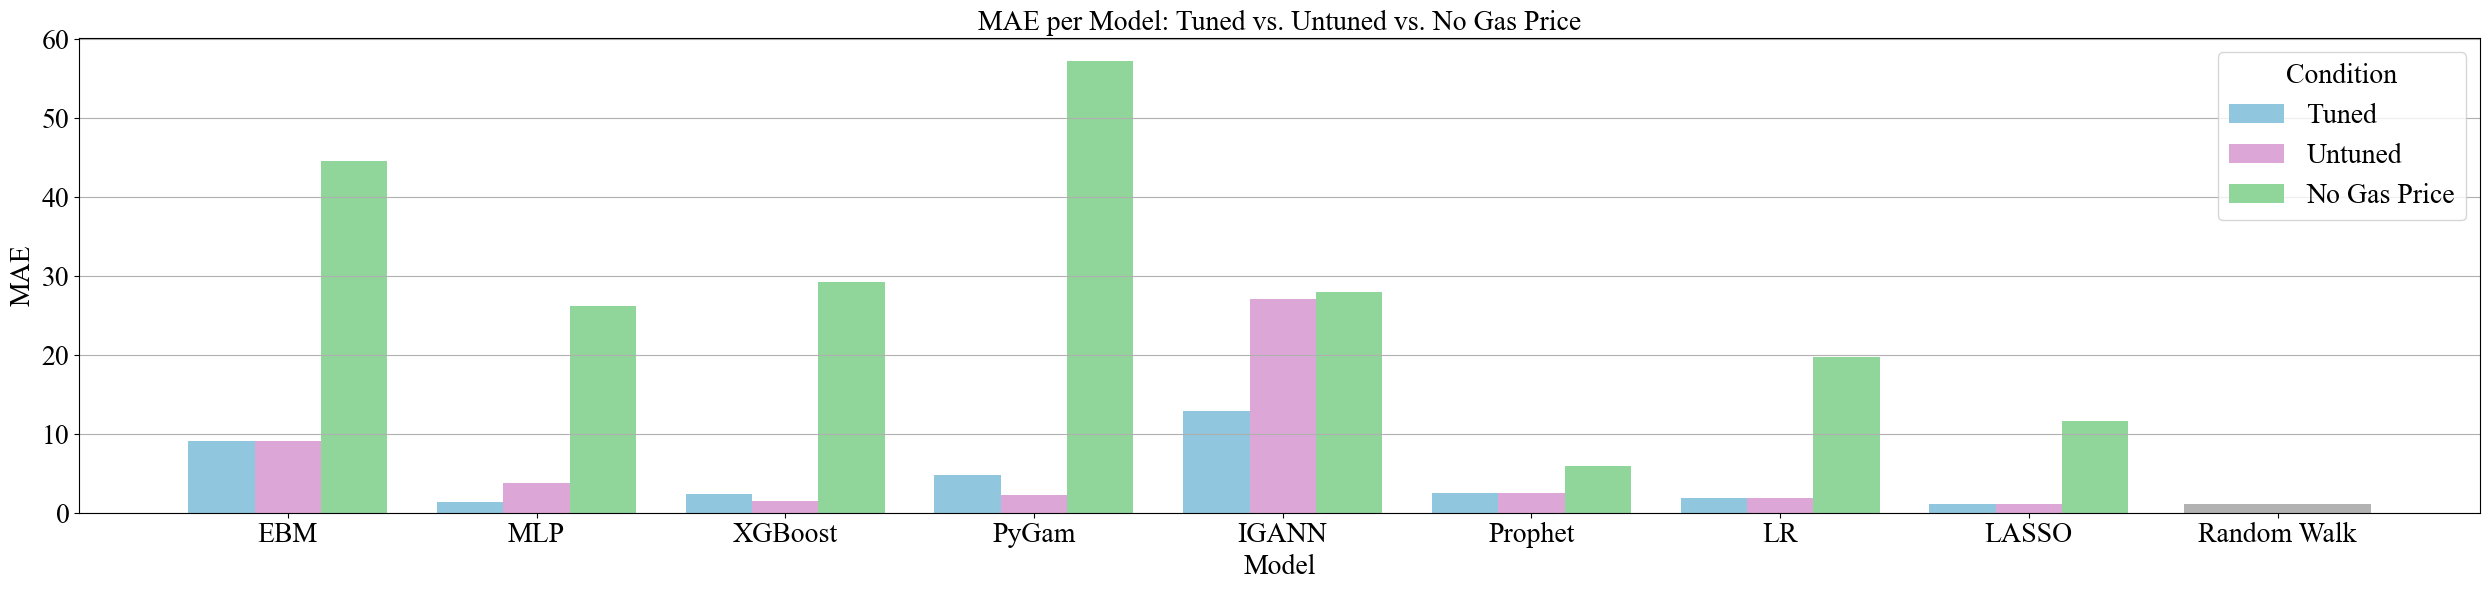

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Times New Roman (optional, wenn verfügbar)
plt.rcParams["font.family"] = "Times New Roman"

# Daten
data = {
    'Model': ['EBM', 'MLP', 'XGBoost', 'PyGam', 'IGANN', 'Prophet', 'LR', 'LASSO', 'Random Walk'],
    'Tuned': [9.0876, 1.2956, 2.3543, 4.7473, 12.8335, 2.5595, 1.8414, 1.1663, 1.1426],
    'Untuned': [9.0876, 3.8183, 1.5394, 2.2987, 27.0971, 2.5595, 1.8414, 1.1663, 1.1426],
    'No Gas Price': [44.4968, 26.2497, 29.2044, 57.2382, 27.9472, 5.9133, 19.7903, 11.6357, 1.1426]
}

# Umstrukturieren für Seaborn
df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Model', var_name='Condition', value_name='MAE')

# Aufteilen
df_non_rw = df_melted[df_melted['Model'] != 'Random Walk']
df_rw = df_melted[df_melted['Model'] == 'Random Walk']

# Farben
palette = {
    'Tuned': '#83CBEB',
    'Untuned': '#E59EDD',
    'No Gas Price': '#84E291'
}
rw_color = '#B2B2B2'

# Plot
fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(data=df_non_rw, x='Model', y='MAE', hue='Condition', palette=palette, ax=ax)

# Random-Walk-Balken manuell hinzufügen
rw_base_index = len(df['Model']) - 1  # Index von Random Walk = 8
x_offsets = {'Tuned': -0.25, 'Untuned': 0, 'No Gas Price': 0.25}

for cond, offset in x_offsets.items():
    mae = df_rw[df_rw['Condition'] == cond]['MAE'].values[0]
    ax.bar(rw_base_index + offset, mae, width=0.25, color=rw_color, label='_nolegend_')

# X-Tick-Beschriftung ergänzen
all_models = df['Model'].tolist()
ax.set_xticks(range(len(all_models)))
ax.set_xticklabels(all_models)

# Manuelle Beschriftung hinzufügen, falls nötig
# ax.text(rw_base_index, -1.5, 'Random Walk', ha='center', fontsize=10)

# Achsen, Titel, Legende
ax.set_title('MAE per Model: Tuned vs. Untuned vs. No Gas Price', fontsize=20)
ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('MAE', fontsize=20)
ax.legend(title='Condition', fontsize=20, title_fontsize=20)
ax.tick_params(axis='both', labelsize=20)  # Balkenbeschriftung (x/y-Ticks)
ax.grid(axis='y')
plt.tight_layout()
plt.show()



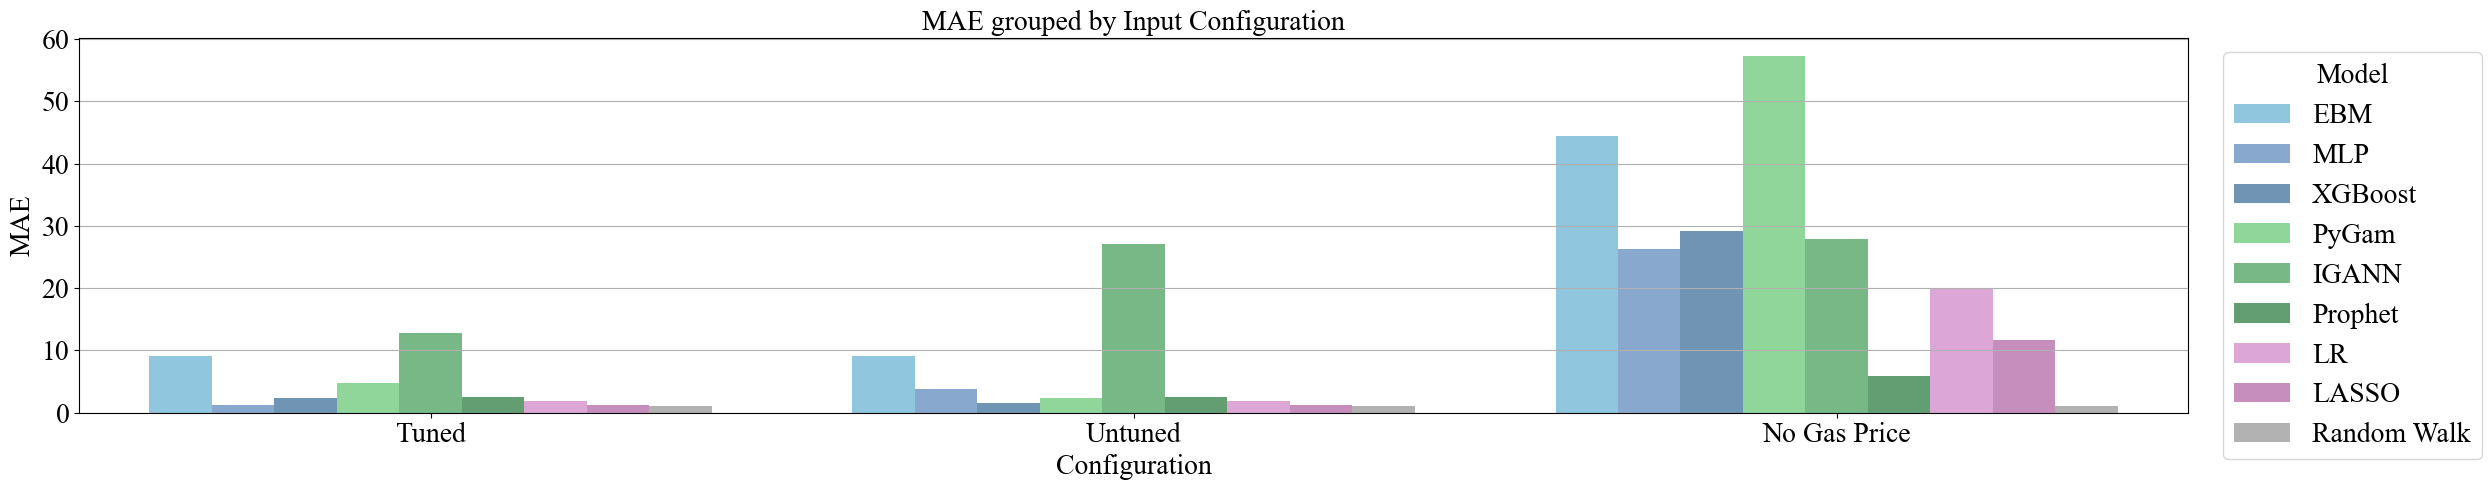

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Datenstruktur transformieren
data = {
    'Model': ['EBM', 'MLP', 'XGBoost', 'PyGam', 'IGANN', 'Prophet', 'LR', 'LASSO', 'Random Walk'],
    'Tuned': [9.0876, 1.2956, 2.3543, 4.7473, 12.8335, 2.5595, 1.8414, 1.1663, 1.1426],
    'Untuned': [9.0876, 3.8183, 1.5394, 2.2987, 27.0971, 2.5595, 1.8414, 1.1663, 1.1426],
    'No Gas Price': [44.4968, 26.2497, 29.2044, 57.2382, 27.9472, 5.9133, 19.7903, 11.6357, 1.1426]
}
df = pd.DataFrame(data)
df = df.melt(id_vars='Model', var_name='Configuration', value_name='MAE')

# Neue Farbharmonie je "Configuration"
model_palette = {
    'EBM': '#83CBEB',
    'MLP': '#7EA7D8',
    'XGBoost': '#6495C0',
    'PyGam': '#84E291',
    'IGANN': '#6DC180',
    'Prophet': '#58A86C',
    'LR': '#E59EDD',
    'LASSO': '#CF85C4',
    'Random Walk': '#B2B2B2'
}

# Plot mit Seaborn, gruppiert nach "Configuration"
plt.figure(figsize=(25, 5))
sns.barplot(data=df, x='Configuration', y='MAE', hue='Model', palette=model_palette)

plt.title('MAE grouped by Input Configuration', fontsize=20)
plt.xlabel('Configuration', fontsize=20)
plt.ylabel('MAE', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Model', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=20, title_fontsize=20)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

